# **Student Performance (Multiple Linear Regression)** #

# *Initial Data Analysis (IDA)*

## Explanation Dataset

Sumber data :
https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

**Variabel Penjelas atau Independen (X):**
1. Hours_studied : Jumlah total jam yang dihabiskan untuk belajar oleh setiap siswa.
2. Previous_score : Nilai yang diperoleh siswa dalam tes sebelumnya.
3. Extracurricular Activities : Apakah siswa berpartisipasi dalam kegiatan ekstrakurikuler (Ya atau Tidak).
4. Sleep_hours : Jumlah rata-rata jam tidur siswa per hari.
5. Sample_question : Jumlah contoh soal yang telah dikerjakan oleh siswa.

**Variabel Target atau Respon (Y):**
Performance_index: Ukuran performa atau nilai akhir keseluruhan dari setiap siswa. Indeks kinerja mewakili performa akademik siswa dan telah dibulatkan ke bilangan bulat terdekat. 

Indeks ini berkisar antara 10 hingga 100, dengan nilai yang lebih tinggi menunjukkan kinerja yang lebih baik.

**NOTE:**
Please note that this dataset is synthetic and created for illustrative purposes. The relationships between the variables and the performance index may not reflect real-world scenarios (dataset not real)

## Load Library dan Membuka Dataset




In [1]:
# Library untuk analisis data
import pandas as pd  # Digunakan untuk mengolah dan analisis data
import numpy as np   # Digunakan untuk operasi numerik dan matematika

# Library untuk visualisasi data
import matplotlib.pyplot as plt   # Digunakan untuk membuat grafik dan visualisasi data.
import seaborn as sns             # Digunakan untuk visualisasi data dengan gaya yang lebih menarik.

# LIBRARY UNTUK ANALISIS REGRESI
from scipy import stats 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## Data Wrangling

In [2]:
nilai = pd.read_csv("C:/Users/HP/Downloads/STATISTIKA/projeknafa/Student_Performance.csv", sep = ",")
nilai

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
nilai.head() # menampilkan baris pertama

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
nilai.tail() # menampilkan baris terakhir

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


## Data Inspection

In [5]:
# menampilkan tipe data
nilai.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [6]:
# Menampilkan informasi tentang DataFrame
nilai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
nilai.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
# Mengecek apakah ada data ganda
duplikat = nilai.duplicated().sum()
duplikat

127

> **interpretasi:** duplikat ini ada, karena kemungkinan beberapa siswa yang memang memiliki nilai mata pelajaran atau kebiasaan yang sama.

In [9]:
# 2 angka di belakang koma 
pd.options.display.float_format = '{:.2f}'.format

## Summary Statistic

In [10]:
nilai.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4.99,69.45,6.53,4.58,55.22
std,2.59,17.34,1.70,2.87,19.21
min,1.00,40.00,4.00,0.00,10.00
25%,3.00,54.00,5.00,2.00,40.00
50%,5.00,69.00,7.00,5.00,55.00
75%,7.00,85.00,8.00,7.00,71.00
max,9.00,99.00,9.00,9.00,100.00


## Menambahkan variabel "ID siswa" 

In [11]:
# Membuat kolom ID Siswa dengan nilai unik untuk setiap siswa
id_siswa = [str(i) for i in range(1, len(nilai) + 1)]

# Menambahkan kolom ID Siswa di awal DataFrame
nilai.insert(0, 'ID', id_siswa)

# *Exploratory Data Analysis ( EDA)*

## **5 Siswa dengan Nilai tertinggi**  

In [12]:
Top5_nilai = nilai.sort_values(by='Performance Index', ascending=False).head(5)
Top5_nilai

,ID,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
2725,2726,9,99,Yes,8,8,100.00
145,146,9,98,Yes,7,7,100.00
2070,2071,9,98,Yes,4,5,100.00
8478,8479,9,96,Yes,8,9,99.00
1157,1158,8,99,Yes,8,9,99.00


## SCATTERPLOT 

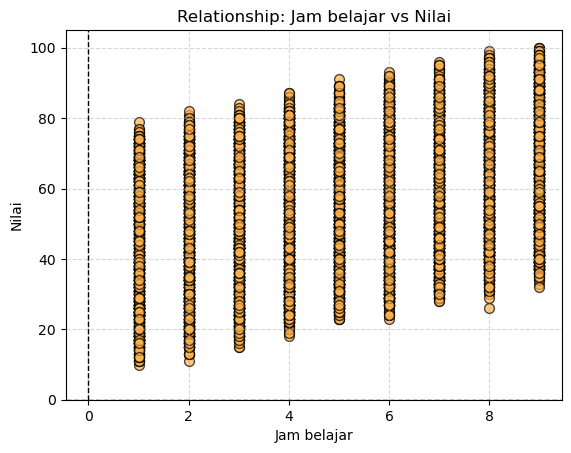

In [13]:
# Relationship Hours Studied - Performance Index 
plt.scatter(x=nilai['Hours Studied'], 
            y=nilai['Performance Index'],
            s=50, c='#feb24c', alpha=0.7, 
            edgecolors='black')  

plt.xlabel('Jam belajar')
plt.ylabel('Nilai')
plt.title('Relationship: Jam belajar vs Nilai')

# Menambahkan garis horizontal pada y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Menambahkan garis vertikal pada x=0
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

# Menambahkan grid untuk membantu membaca plot
plt.grid(True, linestyle='--', alpha=0.5)

# Menambahkan teks atau anotasi jika diperlukan
# plt.text(x_value, y_value, 'Text here', fontsize=12, color='red')

# Menentukan batas sumbu y
plt.ylim(bottom=0)

plt.show()

> **interpretasi:** Plot tidak linier, artinya Lamanya belajar seorang siswa tidak berpengaruh terhadap perfoma index akhir siswa (nilai akhir)

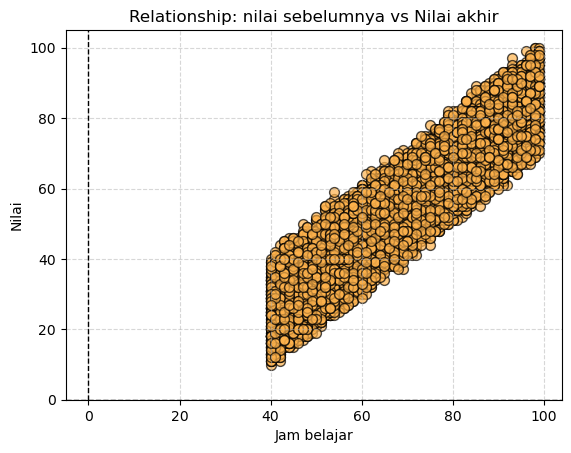

In [14]:
# Relationship Previous Scores - Performance Index 
plt.scatter(x=nilai['Previous Scores'], 
            y=nilai['Performance Index'],
            s=50, c='#feb24c', alpha=0.7, 
            edgecolors='black')  

plt.xlabel('Jam belajar')
plt.ylabel('Nilai')
plt.title('Relationship: nilai sebelumnya vs Nilai akhir')

# Menambahkan garis horizontal pada y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Menambahkan garis vertikal pada x=0
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

# Menambahkan grid untuk membantu membaca plot
plt.grid(True, linestyle='--', alpha=0.5)

# Menambahkan teks atau anotasi jika diperlukan
# plt.text(x_value, y_value, 'Text here', fontsize=12, color='red')

# Menentukan batas sumbu y
plt.ylim(bottom=0)

plt.show()

> **interpretasi:** Plot linier, nilai test yg diperoleh siswa pada test sebelumnya itu berpengaruh pada nilai akhir siswa, seperti nilai tugas tugas harian siswa ataupun UTS (ujian tengah semester) siswa tersebut. Berarti, nilai akhir tersebut adalah akumulasi atau total dari nilai tugas harian dan UTS siswa.

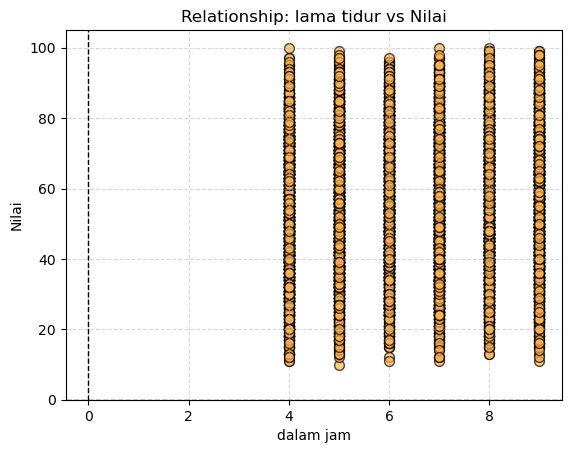

In [15]:
# Relationship Sleep Hours - Performance Index 
plt.scatter(x=nilai['Sleep Hours'], 
            y=nilai['Performance Index'],
            s=50, c='#feb24c', alpha=0.7, 
            edgecolors='black')  

plt.xlabel('dalam jam')
plt.ylabel('Nilai')
plt.title('Relationship: lama tidur vs Nilai')

# Menambahkan garis horizontal pada y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Menambahkan garis vertikal pada x=0
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

# Menambahkan grid untuk membantu membaca plot
plt.grid(True, linestyle='--', alpha=0.5)

# Menentukan batas sumbu y
plt.ylim(bottom=0)

plt.show()

> **interpretasi:** Plot tidak linier, lamanya tidur seorang siswa tidak berpengaruh terhadap nilai akhir. karena kemungkinan waktu yang ada digunakan secara produktif (fokus belajar) oleh siswa tersebut. 

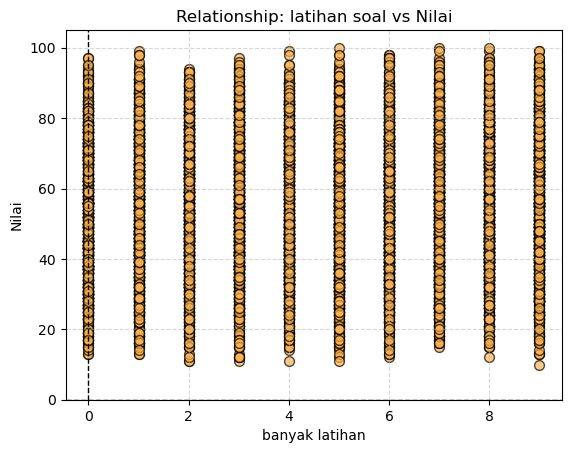

In [16]:
# Relationship Sample Question Papers Practiced - Performance Index 
plt.scatter(x=nilai['Sample Question Papers Practiced'], 
            y=nilai['Performance Index'],
            s=50, c='#feb24c', alpha=0.7, 
            edgecolors='black')  

plt.xlabel('banyak latihan')
plt.ylabel('Nilai')
plt.title('Relationship: latihan soal vs Nilai')

# Menambahkan garis horizontal pada y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Menambahkan garis vertikal pada x=0
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

# Menambahkan grid untuk membantu membaca plot
plt.grid(True, linestyle='--', alpha=0.5)

# Menentukan batas sumbu y
plt.ylim(bottom=0)

plt.show()

> **interpretasi:** Plot tidak linier, banyaknya jumlah latihan soal yg dikerjakan oleh siswa (dalam set soal) tidak berpengaruh terhadap nilai akhir siswa. 
Ini kemungkinan bahwa siswa yg sudah mengerjakan beberapa set soal latihan kurang fit/sehat pada saat mengerjakan soal-soal ujian akhir atau soal latihan sangat berbeda dengan soal ujian akhir.

## HISTOGRAM

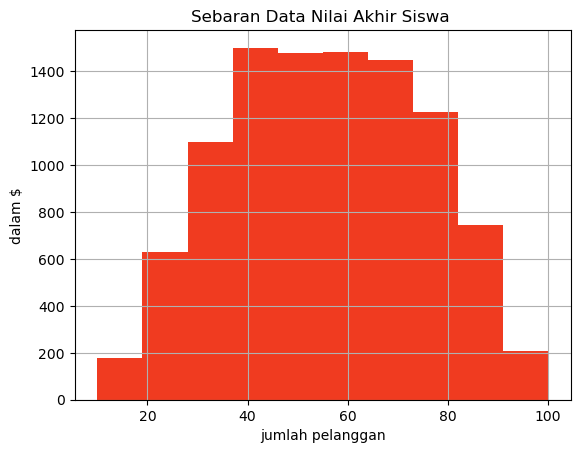

In [17]:
# Performance Index
plt.hist(nilai['Performance Index'], color = ["#f03b20"])
plt.title('Sebaran Data Nilai Akhir Siswa ')
plt.ylabel('dalam $')
plt.xlabel('jumlah pelanggan')
plt.grid(True)

> **interpretasi:** Kebanyakan / mayoritas siswa memperoleh nilai ujian akhir 40 - 80. 

Text(0.5, 1.0, 'banyak latihan soal')

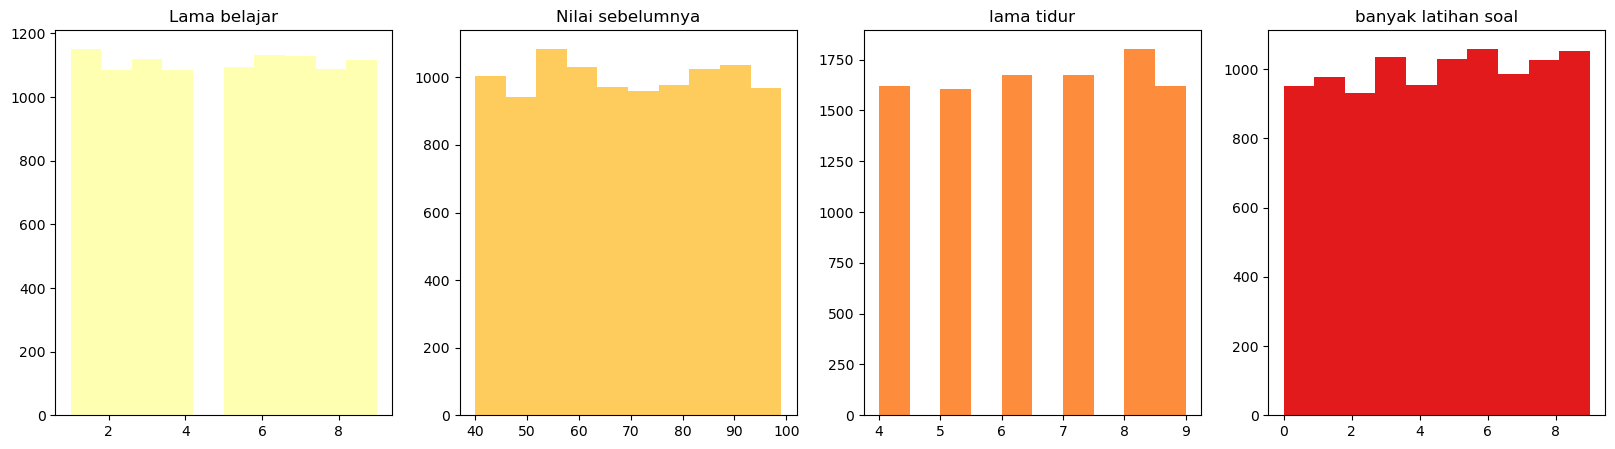

In [18]:
# Variabel independen 

plt.figure(figsize=(20, 5)) # LUAS HISTOGRAM
plt.subplot(1,4,1)
plt.hist(nilai['Hours Studied'], color = ["#ffffb2"])
plt.title('Lama belajar')

plt.subplot(1,4,2)
plt.hist(nilai['Previous Scores'], color = ['#fecc5c'])
plt.title('Nilai sebelumnya')

plt.subplot(1,4,3)
plt.hist(nilai['Sleep Hours'], color = ['#fd8d3c'])
plt.title('lama tidur')

plt.subplot(1,4,4)
plt.hist(nilai['Sample Question Papers Practiced'], color = ['#e31a1c'])
plt.title('banyak latihan soal')

> **interpretasi:** 
1. lama belajar: lama belajar mayoritas siswa sekitar 2-4 jam dan 6- 8 jam. Namun, ada beberapa siswa yg bisa belajar > 8 jam.
2. nilai test sebelumnya: berada pada interval 40 sampai kurang dari 100
3. lama tidur: ada beberapa siswa yg tidur hanya 4 jam dalam sehari. Namun, kebanyakan siswa tidur 8-9 jam per harinya
4. banyak nya latihan soal: kebanyakan siswa mengerjakan 2 sampai 6 set soal latihan

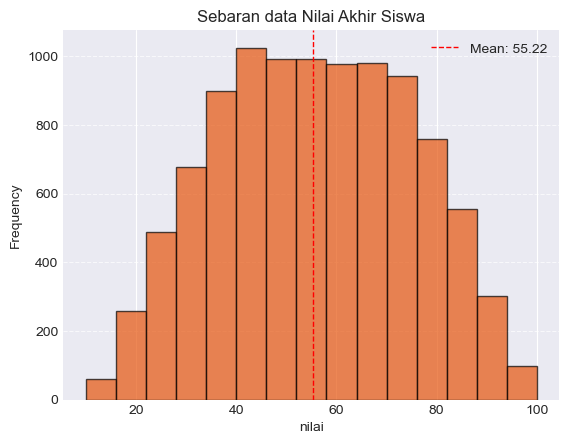

In [19]:
# Performance Index
# Menentukan gaya plot 
plt.style.use('seaborn-darkgrid')

# Plot histogram
plt.hist(nilai['Performance Index'], bins=15, 
         color='#e6550d', 
         edgecolor='black', alpha=0.7)

# Menambahkan garis vertikal untuk nilai rata-rata atau median (opsional)
mean_value = nilai['Performance Index'].mean()
plt.axvline(x=mean_value, 
            color='red', 
            linestyle='--', 
            linewidth=1, 
            label=f'Mean: {mean_value:.2f}')

# Menambahkan judul dan label sumbu
plt.title('Sebaran data Nilai Akhir Siswa')
plt.xlabel('nilai')
plt.ylabel('Frequency')

# Menambahkan legenda (jika diperlukan)
plt.legend()

# Menampilkan grid (opsional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


> **interpretasi:** Rata-rata nilai akhir siswa yaitu 55. kebanyakan nilai akhir siswa berada pada interval 40-80.  

## PIE CHART

## Siswa yang mengikuti Extracurricular Activities

Extracurricular Activities
No     5052
Yes    4948
Name: ID, dtype: int64


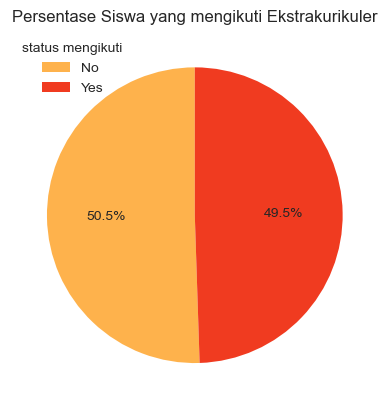

In [20]:
# Extracurricular Activities
eksak = nilai.groupby('Extracurricular Activities')['ID'].count()
print(eksak)

# pie chart
plt.pie(eksak,  
        autopct ='%1.1f%%', 
        startangle = 90, 
       colors=["#feb24c","#f03b20"])

plt.title('Persentase Siswa yang mengikuti Ekstrakurikuler')
plt.legend(labels = eksak.index, 
           loc ="upper left", 
           title="status mengikuti")
plt.show()

> **interpretasi:** Siswa yg tidak mengikuti kegiatan ekstrakuliker lebih banyak daripada yang mengikuti, setengah lebih dari populasi (50,5% dari 10.000 siswa).

## membuat kategori jam belajar

### mengubah variabel kolom 
supaya bisa menggunakan if-else

In [21]:
nilai.columns = ['ID','hours_studied','previous_scores','extracurricular_activities','sleep_hours','sample_question_papers_practiced','performance_index']
nilai

,ID,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,1,7,99,Yes,9,1,91.00
1,2,4,82,No,4,2,65.00
2,3,8,51,Yes,7,2,45.00
3,4,5,52,Yes,5,2,36.00
4,5,7,75,No,8,5,66.00
...,...,...,...,...,...,...,...
9995,9996,1,49,Yes,4,2,23.00
9996,9997,7,64,Yes,8,5,58.00
9997,9998,6,83,Yes,8,5,74.00
9998,9999,9,97,Yes,7,0,95.00


In [22]:
def study(hours_studied):
    if hours_studied < 5:
        return 'cepat'
    elif hours_studied < 10:
        return 'sedang'
    else:
        return 'lama'

In [23]:
nilai['kategori_belajar'] = nilai['hours_studied'].apply(study)
nilai.head()

,ID,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index,kategori_belajar
0,1,7,99,Yes,9,1,91.00,sedang
1,2,4,82,No,4,2,65.00,cepat
2,3,8,51,Yes,7,2,45.00,sedang
3,4,5,52,Yes,5,2,36.00,sedang
4,5,7,75,No,8,5,66.00,sedang


kategori_belajar
cepat     4441
sedang    5559
Name: ID, dtype: int64


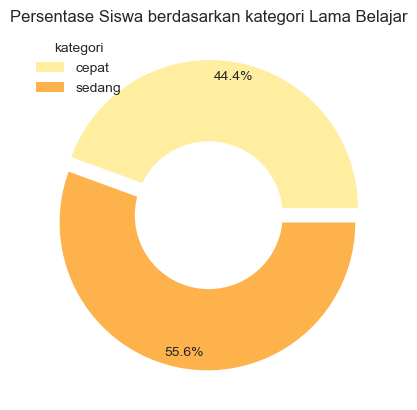

In [24]:
# hours_studied
lama_belajar = nilai.groupby('kategori_belajar')['ID'].count()
print(lama_belajar)

# explosion
explode = (0.05, 0.05)

# Pie Chart
plt.pie(lama_belajar, 
        colors =["#ffeda0","#feb24c"], 
        autopct ='%1.1f%%', 
        pctdistance = 0.9,
        explode = explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc ='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Persentase Siswa berdasarkan kategori Lama Belajar')
labels =lama_belajar.index
# Add Legends
plt.legend(labels, 
           loc ="upper left", 
           title="kategori")
plt.show()

> **interpretasi:** Tidak ada siswa yg belajar lebih 10 jam dalam sehari. Kebanyakan siswa kategori lama belajarnya adalah "sedang", yaitu setengah lebih (55,6%) dari 10.000 siswa lama belajar mereka diantara 5-10 jam dalam sehari.  

## Boxplot 

Text(0, 0.5, 'frekuensi')

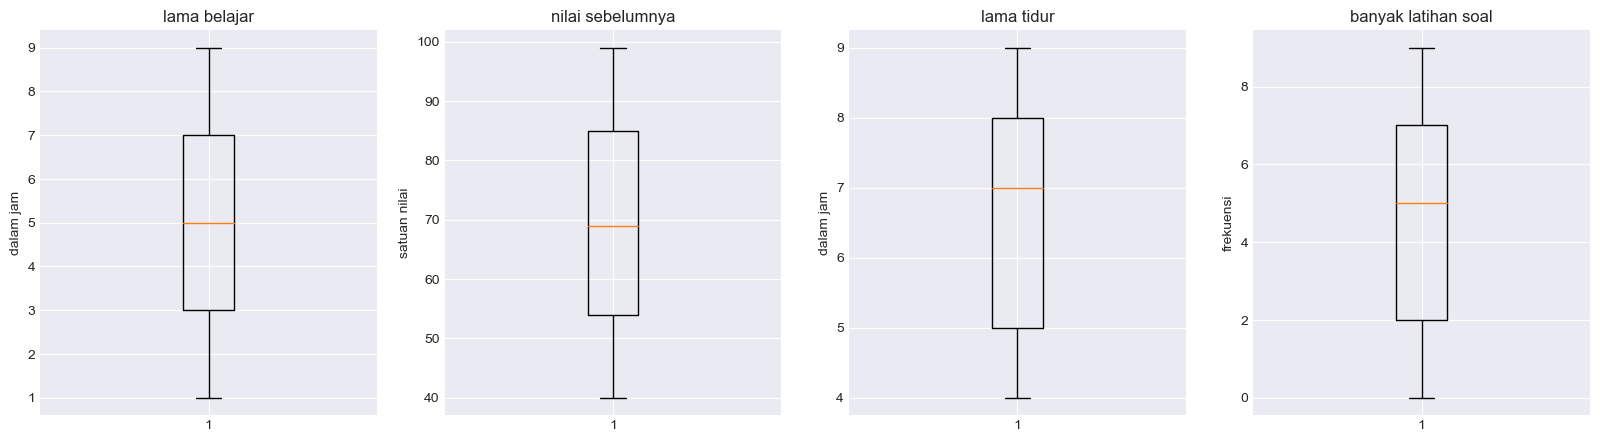

In [25]:
# Variabel Independen
plt.figure(figsize=(20, 5))# LUAS HISTOGRAM
plt.grid(True)
plt.subplot(1,4,1)
plt.boxplot(nilai["hours_studied"])
plt.title('lama belajar')
plt.ylabel('dalam jam')

plt.subplot(1,4,2)
plt.boxplot(nilai["previous_scores"])
plt.title('nilai sebelumnya')
plt.ylabel('satuan nilai')

plt.subplot(1,4,3)
plt.boxplot(nilai["sleep_hours"])
plt.title('lama tidur')
plt.ylabel('dalam jam')

plt.subplot(1,4,4)
plt.boxplot(nilai["sample_question_papers_practiced"])
plt.title('banyak latihan soal')
plt.ylabel('frekuensi')


> **interpretasi:** tidak ada outlier atau pencilan 

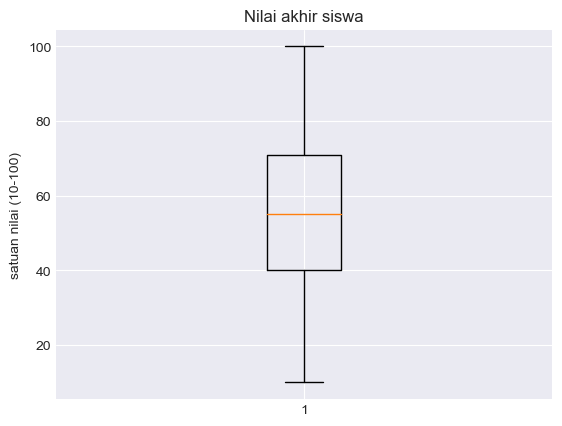

In [26]:
plt.boxplot(nilai["performance_index"])
plt.title('Nilai akhir siswa')
plt.ylabel('satuan nilai (10-100)')
plt.show()

> **interpretasi:** tidak ada pencilan atau outlier, artinya memang nilai siswa hampir rata sebarannya berada di interval 10-100

# **Korelasi Data**

## Heatmap Korelasi data 2020

In [27]:
# Menghapus kolom 'kategori_belajar' dengan mengabaikan kesalahan
nilai.drop('kategori_belajar', axis=1, inplace=True, errors='ignore')
print(nilai)

         ID  hours_studied  previous_scores extracurricular_activities  \
0         1              7               99                        Yes   
1         2              4               82                         No   
2         3              8               51                        Yes   
3         4              5               52                        Yes   
4         5              7               75                         No   
...     ...            ...              ...                        ...   
9995   9996              1               49                        Yes   
9996   9997              7               64                        Yes   
9997   9998              6               83                        Yes   
9998   9999              9               97                        Yes   
9999  10000              7               74                         No   

      sleep_hours  sample_question_papers_practiced  performance_index  
0               9                     

## Data Manipulation 

## Dummy Encoding

In [28]:
# extracurricular_activities (1: yes, 2: no)
def eksak(extracurricular_activities):
    if extracurricular_activities == 'Yes':
        return 1
    else:
        return 0
nilai['extracurricular_activities'] = nilai['extracurricular_activities'].apply(eksak)

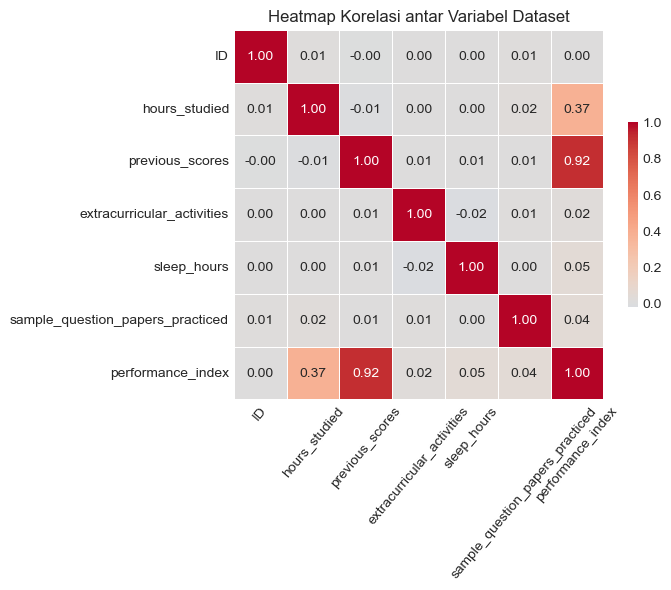

In [29]:
# Menghitung matriks korelasi
korelasi = nilai.corr()

# Membuat heatmap dari matriks korelasi
sns.heatmap(korelasi, 
            vmax=1, 
            center=0, 
            square=True, 
            linewidths=.7, 
            cbar_kws={"shrink": .5}, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm')

# Menambahkan label dan judul
plt.title("Heatmap Korelasi antar Variabel Dataset")

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation = 50)
plt.show()

> **interpretasi:** hanya previous scores (nilai test sebelumnya) yang mempengaruhi nilai akhir siswa. Ini menandakan bahwa nilai akhir siswa adalah akumulasi atau jumlah total dari nilai tugas harian dan UTS (test sebelumnya) seorang siswa

**Interpretasi Nilai r Korelasi Pearson**

Menurut Jonathan Sarono (2009), kekuatan hubungan korelasi
adalah sebagai berikut:
- 0.00 : Tidak ada korelasi
- 0.00 - 0.25 : Korelasi sangat lemah
- 0.25 - 0.50 : Korelasi cukup
- 0.50 - 0.75 : Korelasi kuat
- 0.75 -0.99 : Korelasi sangat kuat
- 1.00 : Korelasi sempurna

Dalam korelasi, angka yang dihasilkan berkisar 
antara 0-1,
tetapi dapat menghasilkan angka yang bernilai positif (+)
ataupun negatif (-).
Jika angka korelasi positif berarti hubungan
bersifat searah. Searah artinya jika variabel bebas besar, variabel tergantung semakin besar. 
Jika menghasilkan angka
negatif berarti hubungan bersifat tidak searah. Tidak searah artinya jika nilai variabel bebas besar, variabel tergantung semakin kecil

> **interpretasi:** 0,92 = nilai test sebelumnya sangat mempengaruhi nilai akhir siswa, semakin besar nilai test sebelumnya maka semakin besar nilai akhir keseluruhan siswa. 
Lamanya belajar siswa dalam sehari tidak berpengaruh sama sekali lamanya tidur siswa, karena bisa jadi siswa menggunakan waktu se-produktif mungkin untuk belajar/ kegiatan. 
Namun, lamanya belajar justru berpengaruh sangat lemah (hampir tidak berpengaruh) dan berkorelasi negatif dengan nilai test sebelumnya. semakin lama siswa belajar, maka semakin kecil nilai test sebelumnya. Mungkin ada beberapa siswa yg tidak efisien dalam waktu belajar atau survei ini dilakukan setelah ujian/test terlaksana.  

# **ANALISIS REGRESI MULTIPLE**

- **Variabel dependent : Emisi CO2 ('CO2_emission(Tons)')**
- **Variabel independent : Luas Wilayah negara ('Area')**

In [30]:
nilai = pd.DataFrame(nilai)
nilai.keys()

Index(['ID', 'hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_papers_practiced', 'performance_index'],
      dtype='object')

In [31]:
x = pd.DataFrame(nilai[['hours_studied', 'previous_scores', 'extracurricular_activities',
                        'sleep_hours', 'sample_question_papers_practiced']])
x

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [32]:
y =pd.DataFrame(nilai['performance_index'])
y

,performance_index
0,91.00
1,65.00
2,45.00
3,36.00
4,66.00
...,...
9995,23.00
9996,58.00
9997,74.00
9998,95.00


## **Asumsi Linier Regresi**

## 1.  LINIERITAS

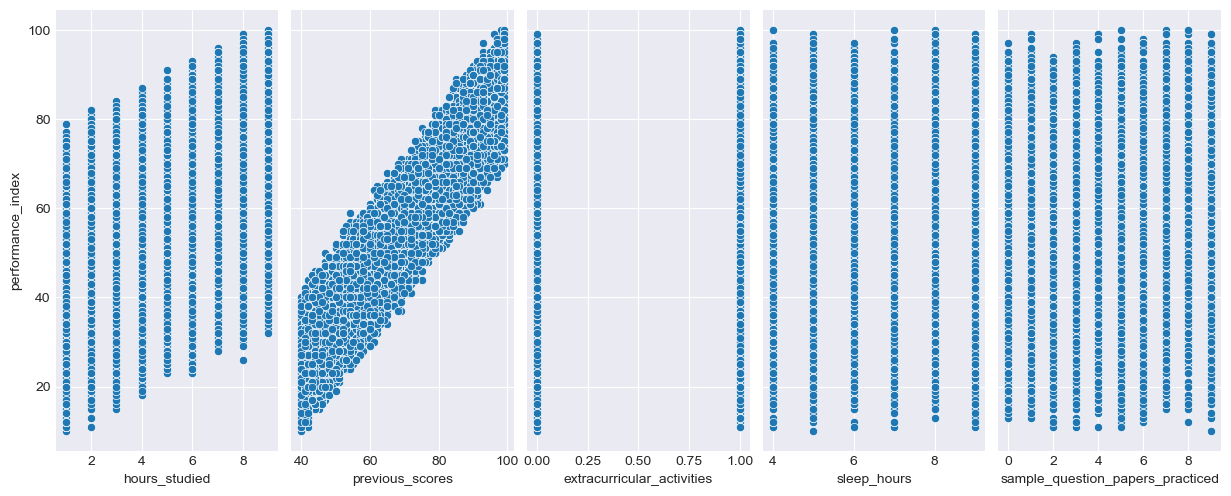

In [33]:
# visualisasi hubunga antara variabel-variabel independen dengan variabel dependen menggunakan scatterplot
p = sns.pairplot(nilai, x_vars=['hours_studied', 'previous_scores', 'extracurricular_activities',
                        'sleep_hours', 'sample_question_papers_practiced'], y_vars=['performance_index'], height=5, aspect=0.5)

> **interpretasi:** Dengan melihat plotnya, bahwa hanya variabel nilai test sebelumnya membentuk bentuk linier yang akurat. Jadi hal ini menunjukkan bahwa penyesuaian regresi linier mungkin bukan model terbaik untuk itu. Model linier mungkin tidak dapat menjelaskan data secar efisien dalam hal variabilitas, akurasi prediksi, dll.

# Fitting the linier model

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)
y_pred

array([[45.28859942],
       [44.76411194],
       [75.90671162],
       ...,
       [50.67535647],
       [25.57646887],
       [77.97218025]])

# R Squared

In [35]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9888387996981384


> **Interpretasi :**
Diperoleh nilai R-Square sebesar 0.988 atau hampir 99 %. Hal tersebut memiliki arti bahwa 99 % variabel dependent (performa index siswa) dapat dijelaskan oleh variabel independent ('hours_studied', 'previous_scores', 'extracurricular_activities', 'sleep_hours', 'sample_question_papers_practiced'). Sedangkan sisanya (100% - 98% = 2%) dijelaskan oleh sebab-sebab atau variabel yang lain.

# **Mean of Residual (ASUMSI MKT)**

In [36]:
import numpy as np # linear algebra
residuals = y_train.values - y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.2238388080731965e-14


> **interpretasi (Asumsi Metode Kuadrat Terkecil (MKT)):** 
Residual adalah selisih antara nilai sebenarnya dan nilai prediksi. Salah satu asumsi regresi linier adalah rata-rata residu harus sama dengan 0.
Dari hasil di atas, menunjukan bahwa rata-rata residual = −0.000000000000012238388080731965. maka dapat dikatakan bahwa data memenuhi salah satu asumsi analisis regresi linier. 

## 2. HOMOSKEDASTISITAS

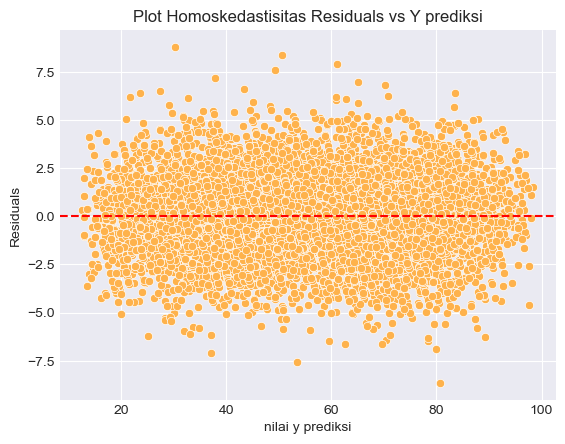

In [37]:
# dengan plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Menjadi 1 dimensi
y_pred_flat = np.array(y_pred).flatten()
residuals_flat = np.array(residuals).flatten()

# Buat plot Y prediksi dengan residual
a = sns.scatterplot(x = y_pred_flat, y = residuals_flat, color = '#feb24c' )
plt.xlabel('nilai y prediksi')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')  # Garis referensi untuk residual nol
plt.title('Plot Homoskedastisitas Residuals vs Y prediksi')
plt.show()

> **interpretasi:** Asumsi Keberagaman Residual (Homoskedastisitas) berarti residu mempunyai varian yang sama atau hampir sama di seluruh garis regresi. Dengan memplotkan nilai prediksi dengan residual (selisih antara nilai observasi dan nilai yang diprediksi), kita dapat memeriksa bahwa tidak boleh ada pola apapun pada error.
Berdasarkan subjektif, dilihat dari plot terlihat bahwa menyebar / tidak ada pola di sekitar garis nol. Hal ini memenuhi asumsi Homoskedastisitas. 

In [38]:
# Pastikan residuals dan X_train adalah numpy array
residuals = np.asarray(residuals)
X_train = np.asarray(X_train)

## Goldfeld Quandt Test

- H0 : Error memiliki varians yang homogen (homokedastisitas)
- H1 : Error memiliki varians yang heterogen (heteroskedastis) = (asumsi homoskedastisitas tidak terpenuhi)

In [39]:
# dengan test statistik
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals,X_train)
lzip(name, test)

[('F statistic', 1.023299426845924), ('p-value', 0.24050245205369553)]

In [40]:
# Ambil keputusan berdasarkan nilai p
alpha = 0.05
f_stat, p_value, _ = test

if p_value < alpha:
    print("Tolak H0: Error memiliki varians yang heterogen (heteroskedastisitas): p-value = {}".format(p_value))
else:
    print("Terima H0: Error memiliki varians yang homogen (homokedastisitas): p-value = {}".format(p_value))


Terima H0: Error memiliki varians yang homogen (homokedastisitas): p-value = 0.24050245205369553


> **interpretasi:** Berdasarkan pengujian statistik (Goldfeld Quandt Test), Varians error homogen atau asumsi homoskedastisitas terpenuhi secara signifikan. 

## Bartlett Test

Uji Bartlett bisa digunakan apabila data yang digunakan telah diuji normalitas dan hasilnya normal. Apabila tidak terindikasi normal maka bisa menggunakan Uji Levene. Sumber: https://codingstudio.id/blog/teknik-uji-homogenitas-dalam-suatu-penelitian/#3_Uji_Levene
- H0 : Dua atau lebih kelompok data sampel yang telah diambil berasal dari populasi yang memiliki variansi yang sama
- H1 : Dua atau lebih kelompok data sampel yang telah diambil berasal dari populasi yang memiliki variansi yang berbeda (Ini merupakan hasil yang tidak baik untuk regresi.)

In [41]:
# uji bartlett
from scipy import stats
# Pastikan bahwa semua parameter yang dimasukkan ke dalam fungsi tersebut adalah 'array numerik'.
bartlett, p_value = stats.bartlett(nilai['hours_studied'], nilai['previous_scores'], nilai['extracurricular_activities'],
                        nilai['sleep_hours'], nilai['sample_question_papers_practiced'])
print("Statistik bartlet:", bartlett)
print("P-value:", p_value)

# Ambil keputusan berdasarkan nilai p
alpha = 0.05 
if p_value < alpha:
    print("(tolak H0) kelima kelompok data sampel tersebut berasal dari populasi dgn varians yg berbeda: {}".format (p_value))
else:
    print("(terima H0)kelima kelompok data sampel tersebut berasal dari populasi dgn varians yg sama: {}".format (p_value))

Statistik bartlet: 113885.83775566869
P-value: 0.0
(tolak H0) kelima kelompok data sampel tersebut berasal dari populasi dgn varians yg berbeda: 0.0


## Levene's Test

In [42]:
# uji Levene
import numpy as np
import scipy.stats as stats

stat, p_value = stats.levene(nilai['hours_studied'], nilai['previous_scores'], nilai['extracurricular_activities'],
                        nilai['sleep_hours'], nilai['sample_question_papers_practiced'])

print("Statistik Levene:", stat)
print("P-value:", p_value)

# Ambil keputusan berdasarkan nilai p
alpha = 0.05 
if p_value < alpha:
    print("(tolak H0) kelima kelompok data sampel tersebut berasal dari populasi dgn varians yg berbeda: {}".format (p_value))
else:
    print("(terima H0)kelima kelompok data sampel tersebut berasal dari populasi dgn varians yg sama: {}".format (p_value))

Statistik Levene: 23044.177723767083
P-value: 0.0
(tolak H0) kelima kelompok data sampel tersebut berasal dari populasi dgn varians yg berbeda: 0.0


## 3. NORMALITAS RESIDUAL

In [43]:
import seaborn as sns

In [44]:
df_residual = pd.DataFrame(residuals)
df_residual

,0
0,-4.29
1,0.24
2,-0.91
3,2.35
4,0.31
...,...
7495,2.48
7496,0.06
7497,3.32
7498,1.42


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

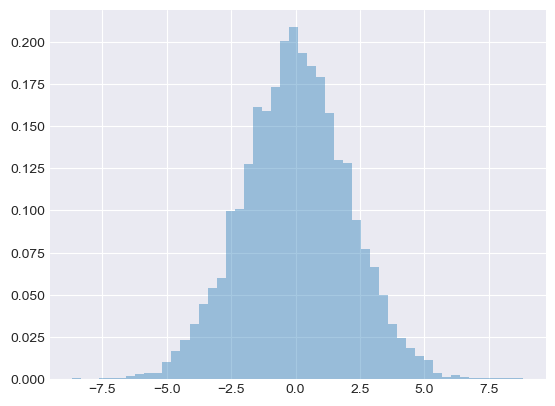

In [45]:
p = sns.distplot(df_residual, kde=True)
p = plt.title('Normality of error terms / residuals')
plt.show()

> **interpretasi:** Terihat bahwa plot normalitas berdistribusi normal, tidak cenderung ke kanan ataupun ke kiri.


### Kolmogorov-Smirnov

- H0: Residual berdistribusi normal.
- H1: Residual tidak berdistribusi normal.

In [46]:
from scipy import stats
stat, p_value = stats.kstest(residuals, "norm")
print("Statistic:", stat)
print("P-value:", p_value)

alpha = 0.05
if p_value <= alpha:
    print(
        "Residuals tidak terdistribusi normal (tolak H0)")
else:
    print(
        "Residuals terdistribusi normal (terima H0)")

Statistic: 1.0
P-value: 0.0
Residuals tidak terdistribusi normal (tolak H0)


> **interpretasi:** berdasarkan uji statistik, asumsi normalitas residual tidak terpenuhi secara signifikan

### Shapiro Wilk

In [47]:
from scipy import stats
stat, p_value = stats.shapiro(residuals)
print("Statistic:", stat)
print("P-value:", p_value)

# Ambil keputusan berdasarkan nilai p
alpha = 0.05
if p_value > alpha:
    print("Residuals terdistribusi normal (terima H0)")
else:
    print("Residuals tidak terdistribusi normal (tolak H0)")

Statistic: 0.9996815919876099
P-value: 0.28790074586868286
Residuals terdistribusi normal (terima H0)


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [48]:
print(len(residuals))

7500


## 4. AUTOKORELASI RESIDUAL

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

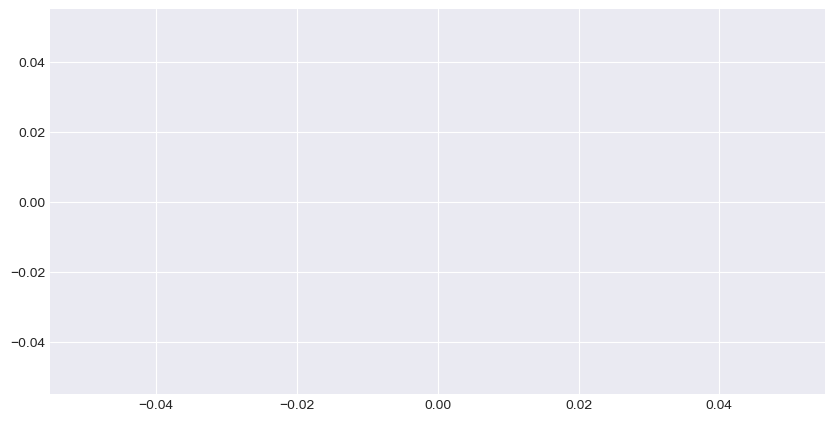

In [49]:
# dengan plot
# harus berdimensi 1
residuals_flat = y_train.values.flatten() - y_pred.flatten() 

plt.figure(figsize = (10, 5))
p = sns.lineplot(x = y_pred.flatten(), y = residuals_flat, marker='o', color='#feb24c')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Plot Autokorelasi y_prediksi vs residual')
plt.show()

> **interpretasi:** Jika residu memiliki autokorelasi, artinya nilai saat ini bergantung pada nilai sebelumnya (historis) dan terdapat pola pasti yang tidak dapat dijelaskan pada variabel Y yang muncul dalam istilah kesalahan, lebih jelasnya terlihat pada data deret waktu. 
Dari plot dapat dilihat bahwa data **tidak ada autokorelasi karena tidak membentuk pola tertentu.** 

### Durbin-Watson (autokorelasi test) 

Statsitik uji Durbin-Watson berkisar di antara 0 dan 4.
- H0: Tidak terdapat autokorelasi
- H1: Terdapat autokorelasi

In [50]:
from statsmodels.stats.stattools import durbin_watson

# Menghitung statistik Durbin-Watson
dw = durbin_watson(residuals)

# Menampilkan hasil uji Durbin-Watson
print('Durbin-Watson statistic:', dw)

# AUTOKORELASI - hasil uji Durbin-Watson
if dw == 2:
    print('Tidak terdapat autokorelasi.')
elif dw < 2:
    print('Terdapat autokorelasi positif.')
else:
    print('Terdapat autokorelasi negatif.')


Durbin-Watson statistic: [1.99709485]
Terdapat autokorelasi positif.


> **interpretasi:** Statsitik uji Durbin-Watson berkisar di antara 0 dan 4. 
- Jika nilai statistik sama dengan 2 maka artinya tidak terdapat autokorelasi. 
- Jika nilai statistik kurang dari 2 maka artinya ada korelasi positif. 
- Jika nilai statistik lebih dari 2 maka artinya ada korelasi negatif. 

Dari hasil pengujian didapat nilai statistik uji Durbin-Watson sebesar 1.997 yang menunjukkan adanya korelasi positif karena kurang dari 2.
Selain itu penyebab hasil menunjukkan adanya autokorelasi karena terdapat satu titik di luar daerah selang kepercayaan yang berwarna merah (plot ACF & PACF di bawah ini). Tetapi karena nilai 1.99 mendekati 2, maka dapat dikatakan **data tidak ada autokorelasi secara signifikan.**

### Plot AUTOKORELASI

In [51]:
import statsmodels.api as sm

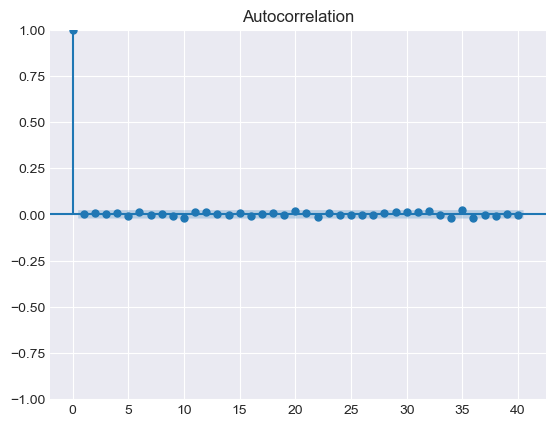

In [52]:
residuals = y_train.values-y_pred
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

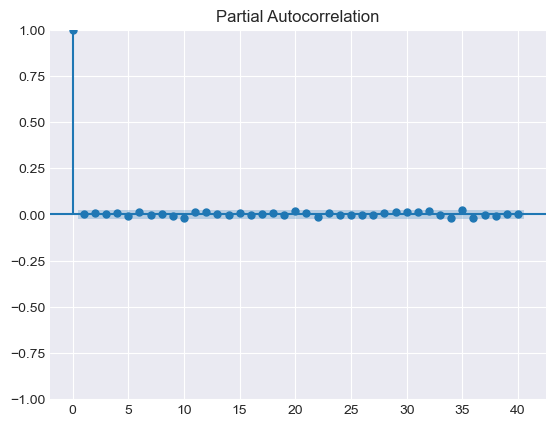

In [53]:
# partial autocorrelation
# note: FutureWarning: Metode default 'yw' dapat menghasilkan nilai PACF di luar interval [-1,1].
sm.graphics.tsa.plot_pacf(residuals, lags=40, method='ywm')
plt.show()

Hasil menunjukkan adanya autokorelasi karena terdapat titik di luar daerah selang kepercayaan berwarna merah.

## 5. MULTIKOLINIERITAS

Dalam regresi, multikolinearitas: **variabel independen saling berkorelasi.** 
Multikolinieritas memengaruhi koefisien dan nilai p, tetapi tidak memengaruhi prediksi, ketepatan prediksi, dan statistik goodness-of-fit. Jika tujuan utama a/d membuat prediksi, dan tidak perlu memahami peran setiap variabel independen, maka tidak perlu mengurangi variabel dengan multikolinieritas yang parah.

### Multikolinieritas dengan Nilai VIF

In [54]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

# Membuat DataFrame untuk menyimpan hasil VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                   for i in range(len(x.columns))]
print("VIF values:\n", vif_data)

# Memeriksa apakah ada variabel dengan VIF > 10
max_vif = vif_data["VIF"].max()
max_vif
if max_vif > 10:
    print(f"variabel dengan VIF {max_vif}, mungkin terdapat multikolinieritas.")
else:
    print("Tidak terdapat multikolinieritas.")

VIF values:
                            Variable   VIF
0                     hours_studied  4.26
1                   previous_scores 10.09
2        extracurricular_activities  1.93
3                       sleep_hours  9.83
4  sample_question_papers_practiced  3.35
variabel dengan VIF 10.088585828679022, mungkin terdapat multikolinieritas.


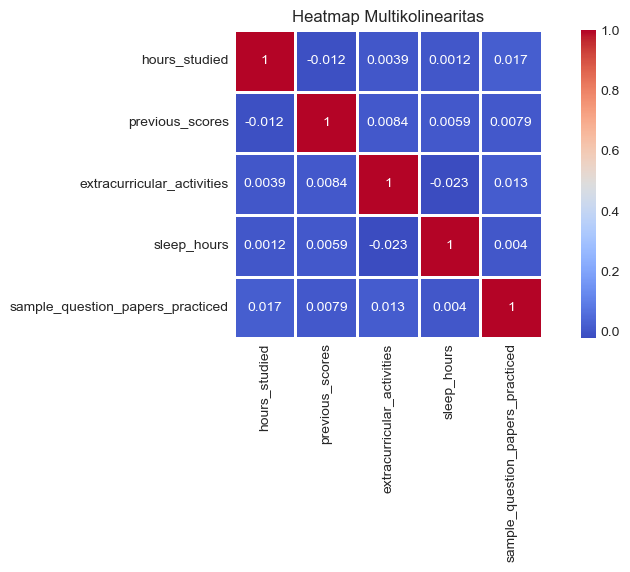

In [55]:
plt.figure(figsize = (10,4))
# Membuat heatmap dari matriks korelasi
p = sns.heatmap(x.corr(), annot = True, cmap = 'coolwarm', 
                square = True, 
                annot_kws = {"size": 10}, 
                linewidths = 1)

# Menambahkan judul
plt.title('Heatmap Multikolinearitas')

# Menampilkan heatmap
plt.show()

> **interpretasi:** dilihat dari heatmap, nilai korelasi antara variabel-variabel independen sangat rendah/kecil. Maka tidak ada pengaruh satu sama lain. **Asumsi Multikolinieritas terpenuhi**

In [56]:
nilai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10000 non-null  object 
 1   hours_studied                     10000 non-null  int64  
 2   previous_scores                   10000 non-null  int64  
 3   extracurricular_activities        10000 non-null  int64  
 4   sleep_hours                       10000 non-null  int64  
 5   sample_question_papers_practiced  10000 non-null  int64  
 6   performance_index                 10000 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 547.0+ KB


# **Pembahasan :**   

**R- Squared:** 0.988 atau hampir 99 %, artinya bahwa 99 % variabel dependent (performa index siswa) dapat dijelaskan oleh variabel independent ('hours_studied', 'previous_scores', 'extracurricular_activities', 'sleep_hours', 'sample_question_papers_practiced'). Sedangkan sisanya (100% - 98% = 2%) dijelaskan oleh sebab-sebab atau variabel yang lain.


### 1.	Uji Linearitas
- Dengan plot = hanya variabel nilai test sebelumnya yang berhubungan linier dengan perfoma index siswa.
- Dengan asumsi MKT, setelah dilakukan pengujian dengan mencari nilai mean of residual diperoleh 0. Dari hasil tersebut, karena nilai mean of residual = 0, maka data ini memenuhi asumsi Linieritas.

### 2. Uji Homoskedastisitas

- dengan plot terlihat bahwa data menyebar di sekitar garis nol  
- dengan pengujian Goldfeld Quandt Test, Varians error homogen atau asumsi homoskedastisitas terpenuhi secara signifikan.
- dengan pengujian Levene's Test, kelima kelompok data sampel tersebut berasal dari populasi dgn varians yg berbeda. 

### 3. Uji Normalitas

- dengan plot: menunjukkan distribusi normal karena data tidak cenderung miring ke kanan ataupun miring ke kiri. 
- dengan uji normalitas (Kolmogrov- Smirnov) diperoleh residual tidak berdistribusi normal.

### 4. Uji Autokorelasi

- dengan plot: data tidak ada hubungan atau autokorelasi karena tidak membentuk pola tertentu. 
- dengan uji Durbin-Watson: sebesar 1.997 yang menunjukkan adanya korelasi positif karena kurang dari 2.
Selain itu penyebab hasil menunjukkan adanya autokorelasi karena terdapat satu titik di luar daerah selang kepercayaan yang berwarna merah. Tetapi karena nilai 1.997 mendekati 2 maka dapat dikatakan data tidak ada autokorelasi.

### 5. Uji Multikoleniaritas

- Jika antar variable bebas memiliki nilai korelasi yang cukup tinggi (di atas 0.80), ini dapat mengindikasikan adanya multikolinearitas. Semua variabel berkorelasi lemah diindakasikan tidak ada multikolinieritas. 
- dengan nilai VIF: data menunjukkan adanya multikolinieritas pada variabel "nilai test sebelumnya" karena nilai VIF > 10. Namun, karena pada heatmap tidak ada nilai korelasi yang tinggi maka **ASUMSI MULTIKOLINIERITAS TERPENUHI.**


###  **KESIMPULAN:**
1. Tidak memenuhi asumsi linieritas dengan plot. 
2. Asumsi Regresi Metode Kuadrat Terkecil (MKT) = 0 terpenuhi
3. Residual memiliki varians yang homogen (homoskedastisitas terpenuhi).
4. Residual berdistribusi normal dengan plot, namun tidak berdistribusi normal dengan uji kolmogorov smirnov.
5. Asumsi autokorelasi terpenuhi
6. Asumsi multikolinearitas terpenuhi. Tidak terdapat multikolinearitas antar variabel bebas. 


# **MODEL REGRESI**

In [57]:
import statsmodels.api as sm

# Menambahkan kolom konstanta untuk perhitungan regresi
X = sm.add_constant(nilai[['hours_studied', 'previous_scores', 'extracurricular_activities',
                        'sleep_hours', 'sample_question_papers_practiced']])

# Model regresi
model1= sm.OLS(nilai['performance_index'], X).fit()

# Menampilkan hasil regresi
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      performance_index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:38:46   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

## Interpretasi: 

- Konstanta (𝜷0) sebesar -34.0756 meyatakan bahwa jika jumlah jam belajar setiap siswa, skor ujian yang didapat sebelumnya, jumlah jam tidur siswa, dan jumlah paket latihan soal yang dipelajari oleh siswa sebelum ujian adalah konstan, maka performa siswa dalam ujian akhir adalah -33.463.

- Koefisien regresi X1 (𝜷1) sebesar 2.8530 menyatakan bahwa setiap penambahan satu jam waktu belajar, maka akan meningkatkan performa siswa dalam ujian akhir sebesar 2.85. Dengan catatan nilai test sebelumnya (X2), keikutsertaan ekstrakurikuler (X3), lama tidur (X4), jumlah paket latihan soal yang dipelajari oleh siswa sebelum ujian (X5) adalah konstan.

- Koefisien regresi X2 (𝜷2) sebesar 1.0184 menyatakan bahwa setiap penambahan satu satuan nilai test sebelumnya, maka akan meningkatkan performa siswa dalam ujian akhir sebesar 1.0184. Dengan catatan jumlah jam belajar setiap siswa (X1), keikutsertaan ekstrakurikuler (X3), lama tidur (X4), jumlah paket latihan soal yang dipelajari oleh siswa sebelum ujian (X5) adalah konstan.

- Koefisien regresi X3 (𝜷3) sebesar 0.6129 maka extracurricular_activities memiliki efek positif, dengan kata lain peluang siswa yang mengikuti kegiatan ekstrakurikuler akan meningkat dengan meningkatnya performa akhir siswa. Dengan catatan jumlah jam belajar setiap siswa (X1), skor ujian yang didapat sebelumnya (X2), lama tidur (X4) jumlah paket latihan soal yang dipelajari oleh siswa sebelum ujian (X5) adalah konstan.

- Koefisien regresi X4 (𝜷4) sebesar 0.4806 menyatakan bahwa setiap penambahan satu jam tidur siswa, maka akan meningkatkan performa siswa dalam ujian akhir sebesar  0.4806 satuan. Dengan catatan jumlah jam belajar setiap siswa (X1), nilai test sebelumnya (X2), keikutsertaan ekstrakurikuler (X3), dan jumlah paket latihan soal yang dipelajari oleh siswa sebelum ujian (X5) adalah konstan.

- Koefisien regresi X5 (𝜷5) sebesar 0.1938 menyatakan bahwa setiap penambahan satu jumlah paket latihan soal yang dipelajari oleh siswa sebelum ujian, maka akan meningkatkan performa siswa dalam ujian akhir sebesar 0.1938 satuan. Dengan catatan jumlah jam belajar setiap siswa (X1), nilai test sebelumnya (X2), keikutsertaan ekstrakurikuler (X3), dan lama tidur (X4) adalah konstan.

## uji simultan (F- test / ANOVA)
- H0 : Model regresi tidak baik
- H1 : Model regresi baik 

- F-statistic:  1.757e+05
- Prob (F-statistic): 0.00
- Kriteria Uji : Tolak H0 apabila P-value <= α
- Keputusan : 0.000 < 0.05 maka H0 ditolak.

- kesimpulan: model regresi linier berganda **cocok** dengan data Student Performance

## Uji T (uji parsial)
- H0: tidak ada pengaruh variabel bebas (X) terhadap variabel terikat (Y) secara signifikan
- H1: ada pengaruh variabel bebas (X) terhadap variabel terikat (Y) secara signifikan

- Kriteria uji: TOLAK H0 Jika nilai Signifikansi (P>|t|) < alpha 0,05, artinya ada pengaruh variabel bebas (X) terhadap variabel terikat (Y) 
- nilai P value dari const & koef. regresi = 0.000 < 0,05 maka kesimpulan: 

- 'lama belajar', 'nilai sebelumnya', 'keikutsertaan ekstrakurikuler', 'lama tidur', 'banyak nya latihan soal yg dikerjakan' berpengaruh **secara siginifikan** terhadap nilai akhir siswa/ performa index siswa. 


# Data Outlier dan Amatan Berpengaruh

saran: lebih baik menggunakan software IBM SPSS untuk menentukan data pencilan dan amatan berpengaruh

nilai.to_csv ("nilai_pencilan.csv", sep = ';', index = False)

In [58]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

x = pd.DataFrame(nilai[['hours_studied', 'previous_scores', 'extracurricular_activities',
                        'sleep_hours', 'sample_question_papers_practiced']])
x
y =pd.DataFrame(nilai['performance_index'])
y
# Tambahkan konstanta (intercept)
X = sm.add_constant(x)

# Fit model
model = sm.OLS(y, X).fit()

# Prediksi nilai Y
nilai['predicted'] = model.fittedvalues

# Hitung residuals
nilai['residuals'] = model.resid

# Standardized Residuals Error (SRE)
nilai['SRE_1'] = model.get_influence().resid_studentized_internal

# Studentized Deleted Residuals (SDR)
nilai['SDR_1'] = model.get_influence().resid_studentized_external

# Leverage (LEV)
nilai['LEV_1'] = model.get_influence().hat_matrix_diag

# Tampilkan nilai-nilai tersebut
print(nilai[['SRE_1', 'SDR_1', 'LEV_1']])

      SRE_1  SDR_1  LEV_1
0     -0.42  -0.42   0.00
1      0.90   0.90   0.00
2     -0.03  -0.03   0.00
3     -0.27  -0.27   0.00
4     -0.54  -0.54   0.00
...     ...    ...    ...
9995   0.69   0.69   0.00
9996   0.74   0.74   0.00
9997   0.49   0.49   0.00
9998   0.31   0.31   0.00
9999  -0.64  -0.64   0.00

[10000 rows x 3 columns]


## Outlier

In [59]:
pencilan_sre = nilai[nilai["SRE_1"] > 2]
len(pencilan_sre)

239

In [60]:
# SDR
# |𝒕𝒊| > 𝒕 𝒕𝒂𝒃𝒆𝒍 (𝜶/𝟐;𝒅𝒇 = 𝒏−𝒑−𝟏) 
# t tabel(0,025; df= 10000-5-1)
import scipy.stats as stats

# Definisikan tingkat signifikansi dan derajat kebebasan
alpha = 0.05
n = int(input("jumlah sampel: "))
p = int(input("jumlah parameter: "))
df = n-p-1

# Nilai t kritis untuk uji dua sisi (dua ekor)
t_tabel_2arah = stats.t.ppf(1 - alpha/2, df)

# Nilai t kritis untuk uji satu sisi (satu ekor)
t_tabel_1arah = stats.t.ppf(1 - alpha, df)

print("Nilai t kritis (2 arah):", t_tabel_2arah)
print("Nilai t kritis (1 arah):", t_tabel_1arah)

jumlah sampel: 10000
jumlah parameter: 5
Nilai t kritis (2 arah): 1.9602013823462576
Nilai t kritis (1 arah): 1.6450061095673394


In [61]:
pencilan_sdr = nilai[abs(nilai["SDR_1"]) > t_tabel_2arah]
len(pencilan_sdr)

520

In [62]:
# hi > (2p)/n
pencilan_lev = nilai[nilai["LEV_1"] > ((2*5)/10000)]
len(pencilan_lev)

150

In [63]:
pencilan = pd.concat([pencilan_sre, pencilan_sdr, pencilan_lev])

In [64]:
pencilan = pencilan.drop_duplicates()
pencilan

,ID,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index,predicted,residuals,SRE_1,SDR_1,LEV_1
235,236,3,54,1,6,3,38.00,33.56,4.44,2.18,2.18,0.00
277,278,9,72,0,7,1,73.00,68.49,4.51,2.22,2.22,0.00
287,288,1,86,1,7,3,67.00,60.92,6.08,2.98,2.98,0.00
292,293,3,52,1,5,7,37.00,31.81,5.19,2.55,2.55,0.00
318,319,7,95,0,8,9,94.00,88.24,5.76,2.83,2.83,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9463,9464,1,51,0,9,0,25.00,25.04,-0.04,-0.02,-0.02,0.00
9520,9521,9,43,0,4,1,36.00,37.51,-1.51,-0.74,-0.74,0.00
9533,9534,1,89,1,9,9,65.00,66.10,-1.10,-0.54,-0.54,0.00
9648,9649,9,98,0,5,9,93.00,95.55,-2.55,-1.25,-1.25,0.00


## Amatan Berpengaruh

In [65]:
nilai_pencilan = pencilan.copy()
nilai_pencilan

,ID,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index,predicted,residuals,SRE_1,SDR_1,LEV_1
235,236,3,54,1,6,3,38.00,33.56,4.44,2.18,2.18,0.00
277,278,9,72,0,7,1,73.00,68.49,4.51,2.22,2.22,0.00
287,288,1,86,1,7,3,67.00,60.92,6.08,2.98,2.98,0.00
292,293,3,52,1,5,7,37.00,31.81,5.19,2.55,2.55,0.00
318,319,7,95,0,8,9,94.00,88.24,5.76,2.83,2.83,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9463,9464,1,51,0,9,0,25.00,25.04,-0.04,-0.02,-0.02,0.00
9520,9521,9,43,0,4,1,36.00,37.51,-1.51,-0.74,-0.74,0.00
9533,9534,1,89,1,9,9,65.00,66.10,-1.10,-0.54,-0.54,0.00
9648,9649,9,98,0,5,9,93.00,95.55,-2.55,-1.25,-1.25,0.00


In [66]:
import statsmodels.api as sm
import pandas as pd
import numpy as np


x = pd.DataFrame(nilai_pencilan[['hours_studied', 'previous_scores', 'extracurricular_activities',
                        'sleep_hours', 'sample_question_papers_practiced']])
x
y =pd.DataFrame(nilai_pencilan['performance_index'])
y
# Tambahkan konstanta (intercept)
X = sm.add_constant(x)

# Fit model
model = sm.OLS(y, X).fit()

# Pengaruh model
influence = model.get_influence()

# Cook's Distance (COO)
nilai_pencilan['COO_1'] = influence.cooks_distance[0]

# DFBeta untuk koefisien (DFB1) dan intercept (DFB0)
dfb = influence.dfbetas
nilai_pencilan['DFB0_1'] = dfb[:, 0]  # Intercept
nilai_pencilan['DFB1_1'] = dfb[:, 1]  # Koefisien variabel pertama
nilai_pencilan['DFB2_1'] = dfb[:, 2]
nilai_pencilan['DFB3_1'] = dfb[:, 3]
nilai_pencilan['DFB4_1'] = dfb[:, 4]
nilai_pencilan['DFB5_1'] = dfb[:, 5]

# DFFits (DFF)
nilai_pencilan['DFF_1'] = influence.dffits[0]

# Tampilkan nilai-nilai tersebut
print(nilai_pencilan[['COO_1', 'DFB0_1','DFB1_1', 'DFB2_1', 'DFB2_1', 'DFB3_1','DFB4_1','DFB5_1','DFF_1']])

      COO_1  DFB0_1  DFB1_1  DFB2_1  DFB2_1  DFB3_1  DFB4_1  DFB5_1  DFF_1
235    0.00    0.04   -0.03   -0.03   -0.03    0.04   -0.01   -0.02   0.07
277    0.00   -0.01    0.06    0.01    0.01   -0.04    0.01   -0.05   0.10
287    0.00   -0.01   -0.08    0.05    0.05    0.05    0.01   -0.03   0.12
292    0.00    0.05   -0.03   -0.05   -0.05    0.05   -0.04    0.04   0.10
318    0.00   -0.08    0.04    0.07    0.07   -0.06    0.04    0.07   0.14
...     ...     ...     ...     ...     ...     ...     ...     ...    ...
9463   0.00   -0.01    0.01    0.00    0.00    0.01   -0.01    0.01  -0.02
9520   0.00   -0.02   -0.02    0.01    0.01    0.01    0.02    0.01  -0.04
9533   0.00    0.02    0.02   -0.01   -0.01   -0.01   -0.01   -0.01  -0.03
9648   0.00    0.01   -0.03   -0.03   -0.03    0.02    0.01   -0.02  -0.05
9791   0.00    0.00    0.00   -0.00   -0.00    0.00   -0.00   -0.00   0.00

[658 rows x 9 columns]


In [67]:
2 * ((5/10000)**0.5)

0.044721359549995794

In [68]:
#  |𝑫𝑭𝑭𝑰𝑻𝑺| > 2 * akar (𝒑/𝒏)
pengaruh_dff = nilai_pencilan[abs(nilai_pencilan["DFF_1"]) > 2 * ((5/10000)**0.5)]
len(pengaruh_dff)

580

In [69]:
#  |𝑫𝑭𝑩𝑬𝑻𝑨𝑺| > 𝟐/(√𝒏)
pengaruh_dfb0 = nilai_pencilan[abs(nilai_pencilan["DFB0_1"]) > 2/((10000)**0.5)]
len(pengaruh_dfb0)

355

In [70]:
pengaruh_dfb1 = nilai_pencilan[abs(nilai_pencilan["DFB1_1"]) > 2/((10000)**0.5)]
len(pengaruh_dfb1)

426

In [71]:
pengaruh_dfb2 = nilai_pencilan[abs(nilai_pencilan["DFB2_1"]) > 2/((10000)**0.5)]
len(pengaruh_dfb2)

432

In [72]:
2/((10000)**0.5)

0.02

In [73]:
pengaruh_dfb3 = nilai_pencilan[abs(nilai_pencilan["DFB3_1"]) > 2/((10000)**0.5)]
len(pengaruh_dfb3)

558

In [74]:
pengaruh_dfb4 = nilai_pencilan[abs(nilai_pencilan["DFB4_1"]) > 2/((10000)**0.5)]
len(pengaruh_dfb4)

387

In [75]:
pengaruh_dfb5 = nilai_pencilan[abs(nilai_pencilan["DFB5_1"]) > 2/((10000)**0.5)]
len(pengaruh_dfb5)

413

In [76]:
# 𝑭𝒕𝒂𝒃𝒆𝒍 (𝜶) ; 𝒑 ; 𝒏−𝒑,
import scipy.stats as stats

# Definisikan tingkat signifikansi dan derajat kebebasan
alpha = 0.05
n = int(input("jumlah sampel: "))
p = int(input("jumlah parameter: "))
dfn = p # Derajat kebebasan pembilang
dfd = n-p # Derajat kebebasan penyebut

# Nilai F kritis untuk uji satu sisi (satu ekor)
f_tabel = stats.f.ppf(1 - alpha, dfn, dfd)

print("Nilai F kritis:", f_tabel)

jumlah sampel: 10000
jumlah parameter: 5
Nilai F kritis: 2.2149936145363975


In [77]:
pengaruh_coo = nilai_pencilan[nilai_pencilan["COO_1"] >  f_tabel]
len(pengaruh_coo)

0

In [78]:
pengaruh = pd.concat([pengaruh_dff, pengaruh_dfb0, pengaruh_dfb1, pengaruh_coo])

In [79]:
pengaruh = pengaruh.drop_duplicates()
pengaruh

,ID,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index,predicted,residuals,SRE_1,SDR_1,LEV_1,COO_1,DFB0_1,DFB1_1,DFB2_1,DFB3_1,DFB4_1,DFB5_1,DFF_1
235,236,3,54,1,6,3,38.00,33.56,4.44,2.18,2.18,0.00,0.00,0.04,-0.03,-0.03,0.04,-0.01,-0.02,0.07
277,278,9,72,0,7,1,73.00,68.49,4.51,2.22,2.22,0.00,0.00,-0.01,0.06,0.01,-0.04,0.01,-0.05,0.10
287,288,1,86,1,7,3,67.00,60.92,6.08,2.98,2.98,0.00,0.00,-0.01,-0.08,0.05,0.05,0.01,-0.03,0.12
292,293,3,52,1,5,7,37.00,31.81,5.19,2.55,2.55,0.00,0.00,0.05,-0.03,-0.05,0.05,-0.04,0.04,0.10
318,319,7,95,0,8,9,94.00,88.24,5.76,2.83,2.83,0.00,0.00,-0.08,0.04,0.07,-0.06,0.04,0.07,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,7841,1,92,1,9,9,71.00,69.16,1.84,0.91,0.91,0.00,0.00,-0.02,-0.02,0.02,0.02,0.02,0.02,0.04
8665,8666,1,40,0,4,8,12.00,12.99,-0.99,-0.48,-0.48,0.00,0.00,-0.03,0.01,0.02,0.01,0.02,-0.01,-0.03
9520,9521,9,43,0,4,1,36.00,37.51,-1.51,-0.74,-0.74,0.00,0.00,-0.02,-0.02,0.01,0.01,0.02,0.01,-0.04
424,425,9,50,1,9,9,51.00,49.21,1.79,0.88,0.88,0.00,0.00,-0.01,0.02,-0.02,0.02,0.02,0.02,0.04


## Perbandingan Model Terbaik 

In [80]:
# MODEL MASIH ADA PENCILAN & DATA BERPENGARUH
import statsmodels.api as sm

# Menambahkan kolom konstanta untuk perhitungan regresi
X = sm.add_constant(nilai[['hours_studied', 'previous_scores', 'extracurricular_activities',
                        'sleep_hours', 'sample_question_papers_practiced']])

# Model regresi
model1= sm.OLS(nilai['performance_index'], X).fit()

# Menampilkan hasil regresi
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      performance_index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:40:40   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [81]:
nilai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10000 non-null  object 
 1   hours_studied                     10000 non-null  int64  
 2   previous_scores                   10000 non-null  int64  
 3   extracurricular_activities        10000 non-null  int64  
 4   sleep_hours                       10000 non-null  int64  
 5   sample_question_papers_practiced  10000 non-null  int64  
 6   performance_index                 10000 non-null  float64
 7   predicted                         10000 non-null  float64
 8   residuals                         10000 non-null  float64
 9   SRE_1                             10000 non-null  float64
 10  SDR_1                             10000 non-null  float64
 11  LEV_1                             10000 non-null  float64
dtypes: fl

In [82]:
nilai_tanpa_pencilan = nilai.drop(pengaruh.index)
nilai_tanpa_pencilan

,ID,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index,predicted,residuals,SRE_1,SDR_1,LEV_1
0,1,7,99,1,9,1,91.00,91.85,-0.85,-0.42,-0.42,0.00
1,2,4,82,0,4,2,65.00,63.16,1.84,0.90,0.90,0.00
2,3,8,51,1,7,2,45.00,45.05,-0.05,-0.03,-0.03,0.00
3,4,5,52,1,5,2,36.00,36.55,-0.55,-0.27,-0.27,0.00
4,5,7,75,0,8,5,66.00,67.09,-1.09,-0.54,-0.54,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,49,1,4,2,23.00,21.60,1.40,0.69,0.69,0.00
9996,9997,7,64,1,8,5,58.00,56.50,1.50,0.74,0.74,0.00
9997,9998,6,83,1,8,5,74.00,73.00,1.00,0.49,0.49,0.00
9998,9999,9,97,1,7,0,95.00,94.37,0.63,0.31,0.31,0.00


In [83]:
# MODEL TANPA PENCILAN & BERPENGARUH
import statsmodels.api as sm
# Menambahkan kolom konstanta untuk perhitungan regresi
X = sm.add_constant(nilai_tanpa_pencilan[['hours_studied', 'previous_scores', 'extracurricular_activities',
                        'sleep_hours', 'sample_question_papers_practiced']])

# Model regresi
model2 = sm.OLS(nilai_tanpa_pencilan['performance_index'], X).fit()

# Menampilkan hasil regresi
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      performance_index   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.202e+05
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:40:40   Log-Likelihood:                -18656.
No. Observations:                9410   AIC:                         3.732e+04
Df Residuals:                    9404   BIC:                         3.737e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [84]:
# MODEL TANPA PENCILAN
x = nilai_tanpa_pencilan[['hours_studied', 'previous_scores', 'extracurricular_activities',
                        'sleep_hours', 'sample_question_papers_practiced']]
y = nilai_tanpa_pencilan['performance_index']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)
y_pred

array([81.45069497, 38.54197416, 48.08635529, ..., 82.92900118,
       79.06619421, 81.77022301])

In [85]:
x

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [86]:
# MSE MODEL DATA TANPA PENCILAN 
import numpy as np # linear algebra
residuals = y_train.values - y_pred
mean_residuals2 = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals2))

Mean of Residuals 2.238254926448495e-15


In [87]:
# PENGECEKAN MSE MODEL TERKECIL
mean_residuals < mean_residuals2

True

#### Tetap menggunakan Data awal dan Model dengan data yang masih ada pencilan & amatan berpengaruhnya nya  karena MSE pada data awal (masih ada pencilan & amatan berpengaruh) lebih kecil dibandingkan data kedua (setelah dihapus pencilan & amatan berpengaruhnya)

## Model regresi yang digunakan untuk data Student Performance (Multiple Linear Regression):

-34.0756 + 2.8530 * Hours_studied + 1.0184 * Previous_score + 0.6129 * Extracurricular Activities + 0.4806 * Sleep_hours  + 0.1938 * Sample_question

In [88]:
# Contoh cara penggunaan
print("Prediksi Nilai Akhir Siswa")
a = int(input("lama belajar (jam): "))
b = int(input("nilai ujian sebelumnya: "))
c = int(input("keikutsertaan ekstrakurikuler (yes = 1, no = 0): "))
d = int(input("lama tidur (jam): "))
e = int(input("banyaknya latihan soal: "))


# Prediksi nilai akhir siswa
prediksi =  -34.0756 + 2.8530 * a + 1.0184* b + 0.6129 * c + 0.4806 * d + 0.1938*e
print("Nilai akhir siswa tersebut diperkirakan =", prediksi)

Prediksi Nilai Akhir Siswa
lama belajar (jam): 2
nilai ujian sebelumnya: 90
keikutsertaan ekstrakurikuler (yes = 1, no = 0): 1
lama tidur (jam): 8
banyaknya latihan soal: 5
Nilai akhir siswa tersebut diperkirakan = 68.71309999999998
